# Packages used 

In [1]:
import numpy as np 
from astropy.io import fits
import os
import matplotlib.pyplot as plt 

# Loading files from the folder

In [2]:
folder0 = "20250520_040914"
paths0 = [os.path.join(folder0, name0) for name0 in sorted(os.listdir(folder0))]

paths0

['20250520_040914\\SP3D20250520_040914.1C.fits',
 '20250520_040914\\SP3D20250520_040919.0C.fits',
 '20250520_040914\\SP3D20250520_040922.8C.fits',
 '20250520_040914\\SP3D20250520_040926.6C.fits',
 '20250520_040914\\SP3D20250520_040930.4C.fits',
 '20250520_040914\\SP3D20250520_040934.2C.fits',
 '20250520_040914\\SP3D20250520_040938.0C.fits',
 '20250520_040914\\SP3D20250520_040941.8C.fits',
 '20250520_040914\\SP3D20250520_040945.6C.fits',
 '20250520_040914\\SP3D20250520_040949.4C.fits',
 '20250520_040914\\SP3D20250520_040953.2C.fits',
 '20250520_040914\\SP3D20250520_040957.0C.fits',
 '20250520_040914\\SP3D20250520_041000.8C.fits',
 '20250520_040914\\SP3D20250520_041004.6C.fits',
 '20250520_040914\\SP3D20250520_041008.4C.fits',
 '20250520_040914\\SP3D20250520_041012.1C.fits',
 '20250520_040914\\SP3D20250520_041015.9C.fits',
 '20250520_040914\\SP3D20250520_041019.7C.fits',
 '20250520_040914\\SP3D20250520_041023.5C.fits',
 '20250520_040914\\SP3D20250520_041027.3C.fits',
 '20250520_040914\\S

# Creating the compressed file

In [3]:
data_list = []

for file in paths0:
    with fits.open(file) as hdul:
        data = hdul[0].data  
        data_list.append(data)

# Convert the list to a numpy array
data_array = np.array(data_list)  

# Rearrange the axes to the desired format
combined_data = np.transpose(data_array, (2, 0, 1, 3))  

# Create a new FITS file with the combined data
header = fits.open(paths0[0])[0].header # Use the header from the first file

fits.writeto('combined_'+paths0[0][-43:-28]+'.fits', combined_data, header, overwrite=True)

# Normalization of data by the mean intensity value in the continuum

In [4]:
stokes = np.copy(combined_data)
stokes = stokes.astype("float64")  

I_qs = np.mean(combined_data[:,:,0,:10]) 
stokes /= I_qs

# Some plots

#

* ### Intensity map continuum

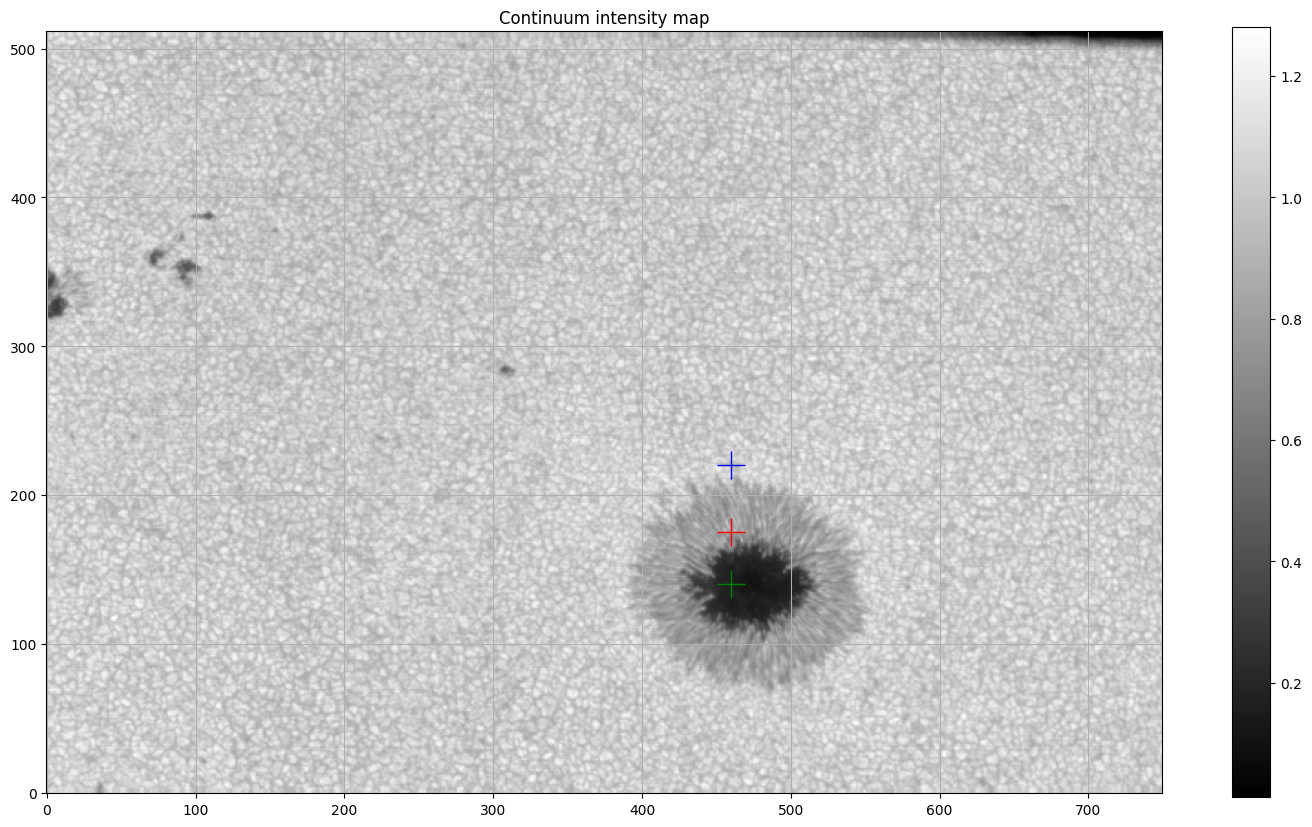

In [5]:
plt.figure(figsize=[18, 10])

plt.imshow(stokes[:,:,0,0], origin='lower', cmap='gray')

# Three points represented on the plot by the symbol +
plt.plot(460, 175, 'r+', ms= 20)
plt.plot(460, 140 ,'g+', ms= 20)
plt.plot(460, 220 ,'b+', ms= 20)

plt.colorbar()  
plt.title("Continuum intensity map")

plt.grid()

# Function for saving (uncomment for use)

#plt.savefig('Continnum intensity map.png', dpi=300, transparent=True, bbox_inches='tight')  

plt.show()

#

* ### Stokes profiles for one point (112 wavelength)
    * Simbol <span style="color:blue">*+* </span> use px = 460, py = 220.
    * Simbol <span style="color:red">*+* </span> use px = 460, py = 175.
    * Simbol <span style="color:green">*+* </span> use px = 460, py = 145.

In [6]:
px = 220
py = 460

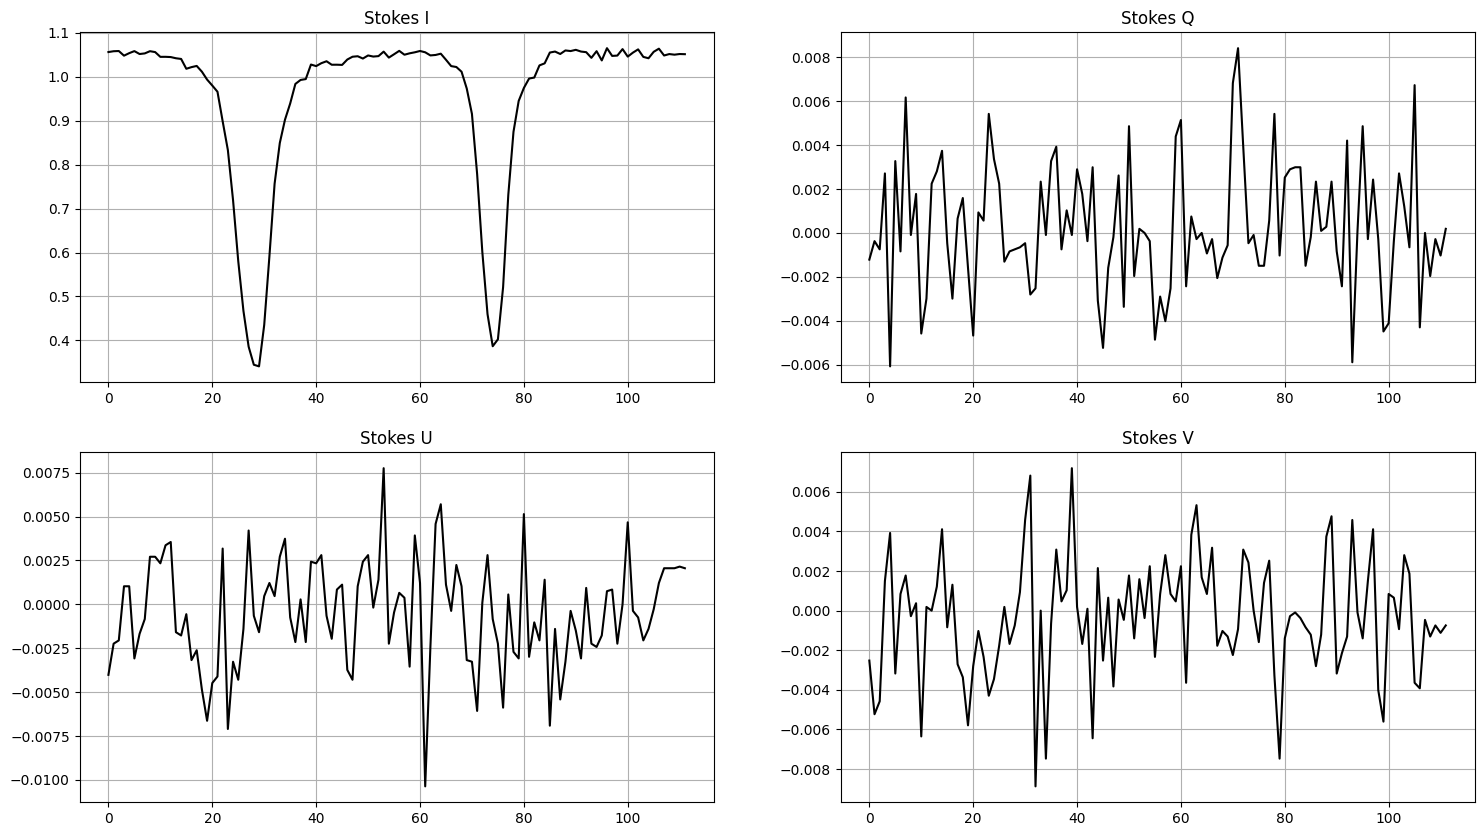

In [7]:
fig, axs = plt.subplots(2, 2, figsize=[18,10])
    
# Stokes I
axs[0,0].plot(stokes[int(py), int(px), 0,:], color = 'k' )
axs[0,0].grid()

# Stokes Q
axs[0,1].plot(stokes[int(py), int(px), 1,:], color = 'k')
axs[0,1].grid()

# Stokes U
axs[1,0].plot(stokes[int(py), int(px), 2,:], color = 'k')
axs[1,0].grid()

# Stokes V
axs[1,1].plot(stokes[int(py), int(px), 3,:], color = 'k')
axs[1,1].grid()

axs[0,0].set_title("Stokes I")
axs[0,1].set_title("Stokes Q")
axs[1,0].set_title("Stokes U")
axs[1,1].set_title("Stokes V")

#plt.savefig('Stokes_IQUV_POINTS.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

#

* ### Stokes Maps (For a wavelength)

In [8]:
# wavelength index

ind_wl = 30 

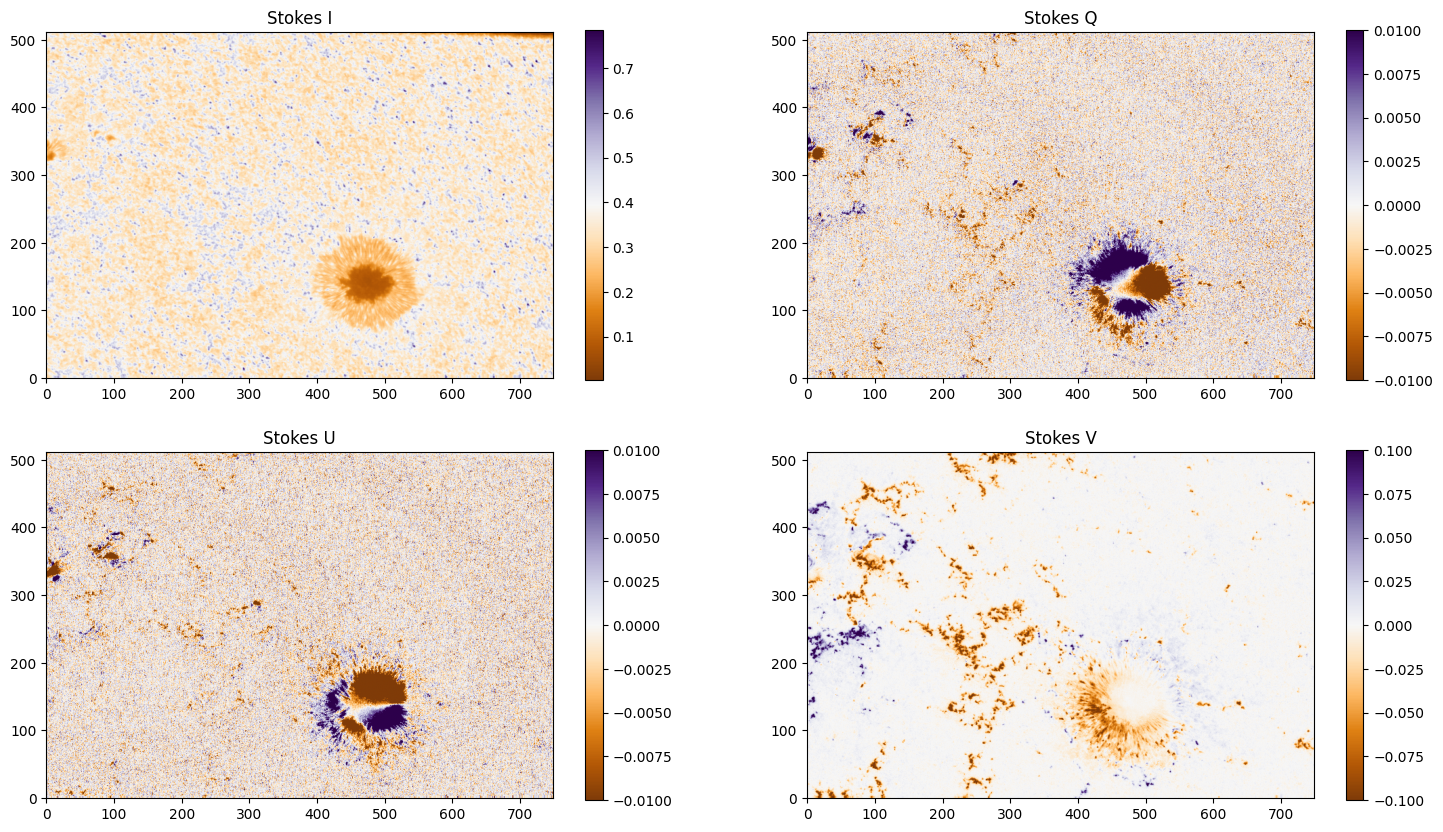

In [9]:
plt.figure(figsize=[18,10])

# Stokes I
plt.subplot(221)
plt.imshow(stokes[:,:,0, ind_wl],origin='lower',cmap='PuOr')
plt.colorbar()
plt.title("Stokes I")

# Stokes Q
plt.subplot(222)
plt.imshow(stokes[:,:,1, ind_wl],origin='lower',cmap='PuOr',vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.title("Stokes Q")

# Stokes U
plt.subplot(223)
plt.imshow(stokes[:,:,2, ind_wl],origin='lower',cmap='PuOr',vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.title("Stokes U")

# Stokes V
plt.subplot(224)
plt.imshow(stokes[:,:,3, ind_wl],origin='lower',cmap='PuOr', vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.title("Stokes V")

plt.show()

#

* ### Average intensity spectrum

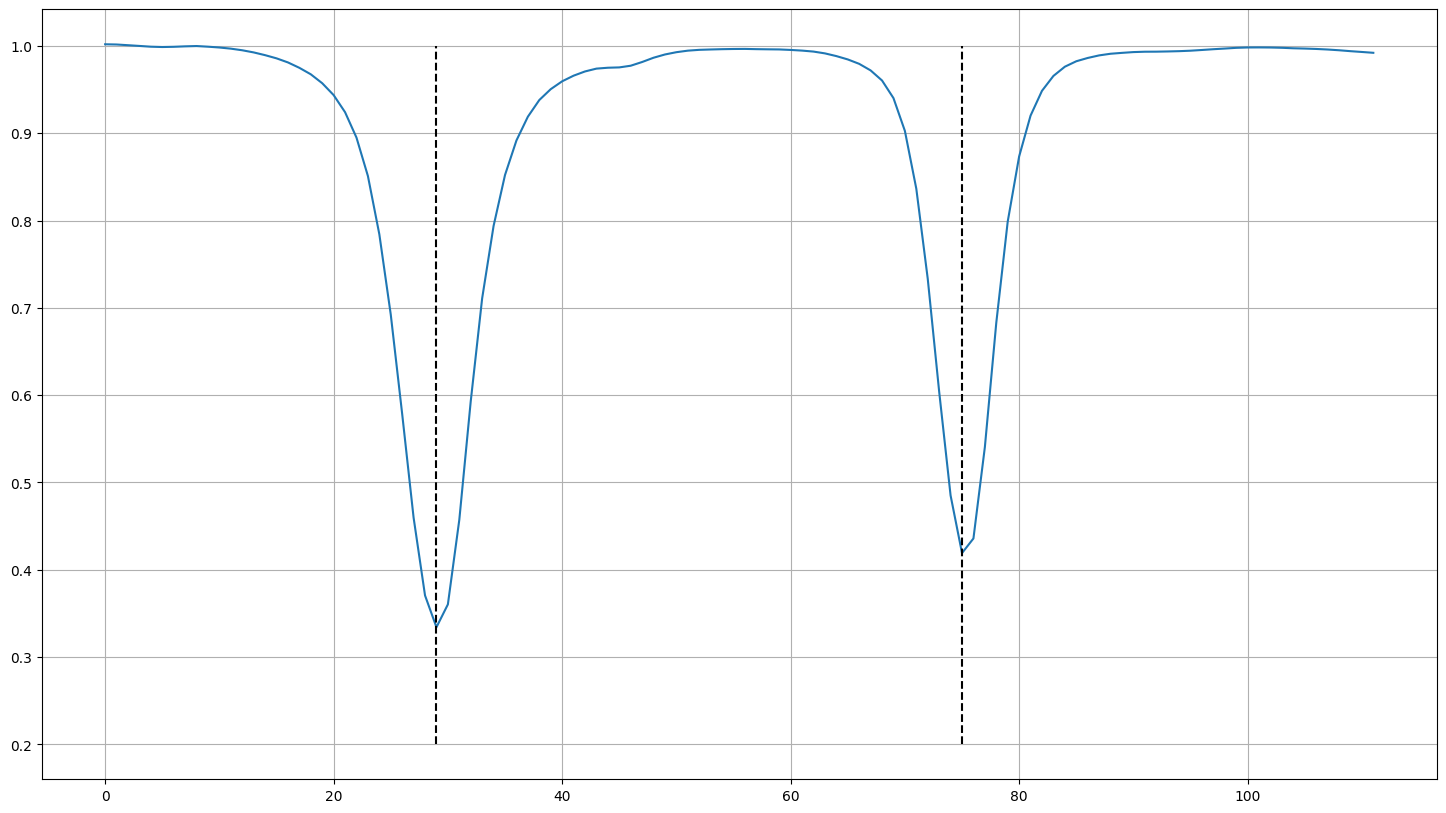

In [10]:
mean_spectrum = np.mean(stokes[:,:,0,:], axis=(0,1))

plt.figure(figsize=[18, 10])

plt.plot(mean_spectrum)
plt.vlines(29, 0.2 , 1, color = 'k', linestyles = 'dashed')
plt.vlines(75, 0.2 , 1, color = 'k', linestyles = 'dashed')

plt.grid()

plt.show()